In [1]:
import matplotlib
#matplotlib.use('QT5Agg')

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
sigma = 10
b = 8 / 3
r = 10

In [4]:
def dxdt(v):
    return -sigma * v[0] + sigma * v[1]
def dydt(v):
    return -v[0] * v[2] + r * v[0] - v[1]
def dzdt(v):
    return v[0] * v[1] - b * v[2]
system = [dxdt, dydt, dzdt]

In [5]:
def euler1(x, h):
    return [x[0] + h * dxdt(x)
            , x[1] + h * dydt(x)
            , x[2] + h * dzdt(x)]
def euler2(x, h):
    return [(x[0] + h * sigma * (x[1] + h)) / (1 + sigma * h)
          , (x[1] - h * (x[0] + h) * (x[2] + h) + h * r * (x[0] + h)) / (1 + h)
          , (x[2] + h * (x[0] + h) * (x[1] + h)) / (1 + b * h)]

In [6]:
def rnk(x, h):
    k1 = np.array([f(x) for f in system])
    k2 = np.array([f(x + h / 2 * k1) for f in system])
    k3 = np.array([f(x + h / 2 * k2) for f in system])
    k4 = np.array([f(x + h * k3) for f in system])
    return x + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)   

In [7]:
def adams(xs, i, h, k):
    if i < k:
        return rnk(xs[i - 1], h)
    else:
        x1, x2, x3, x4 = xs[i - 4 : i]
        y1 = np.array([f(x1) for f in system])
        y2 = np.array([f(x2) for f in system])        
        y3 = np.array([f(x3) for f in system])        
        y4 = np.array([f(x4) for f in system])
        return x4 + h * (55 / 24 * y4 - 59 / 24 * y3 \
                        + 37 / 24 * y2 - 3 / 8 * y1)

In [8]:
def method(name):
    ms = {'RK' : lambda xs, i, h: rnk(xs[i-1], h)}
    ms['euler1'] = lambda xs, i, h: euler1(xs[i-1], h)
    ms['euler2'] = lambda xs, i, h: euler2(xs[i-1], h)
    ms['adams'] = lambda xs, i, h: adams(xs, i, h, 4)
    return ms[name]

In [9]:
def solve(start_x, delta_t, method, n):
    vs = np.zeros((n,3))
    vs[0] = start_x
    for i in range(1, n):
        h = method(vs, i, delta_t)
        vs[i] = h
    return vs.T

In [54]:
'{0:.2}'.format(1123123123e-15)

'1.1e-06'

In [56]:
def draw(start_x = np.array([2,4,3]), delta_t = 0.02, n = 1000, method_name = 'adams'):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', label = 'z')
    xs, ys, zs = solve(start_x, delta_t, method(method_name), n)
    ax.plot(xs, ys, zs)
    plt.title('r = {0}'.format(r))
    plt.show()

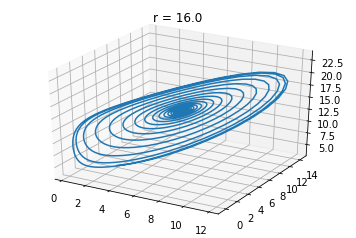

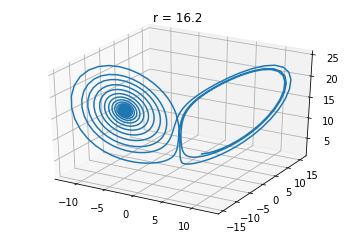

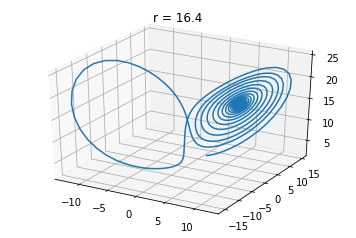

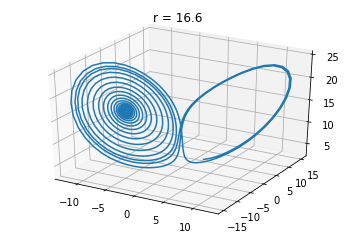

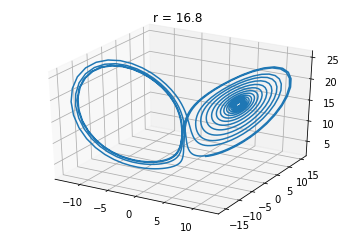

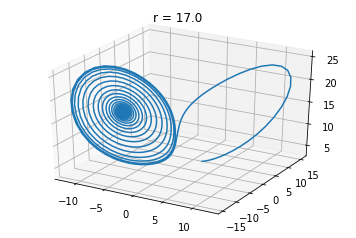

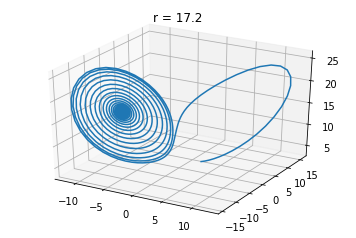

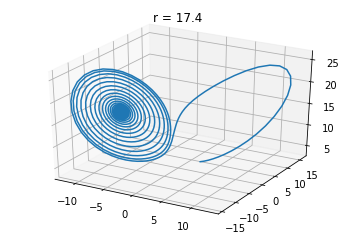

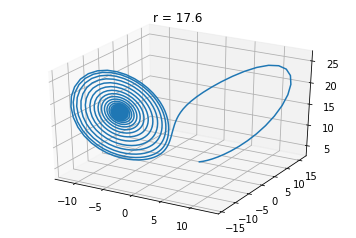

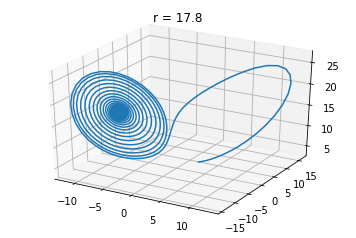

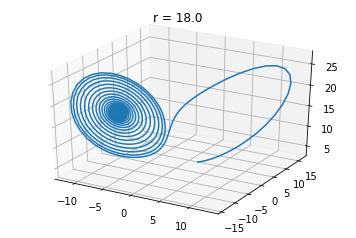

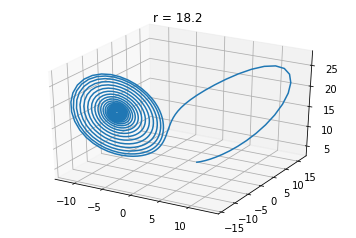

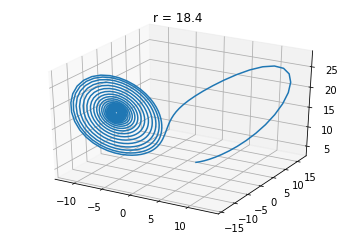

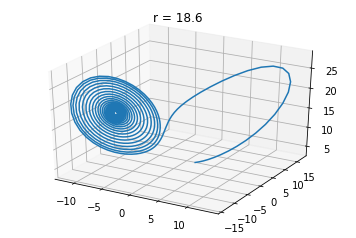

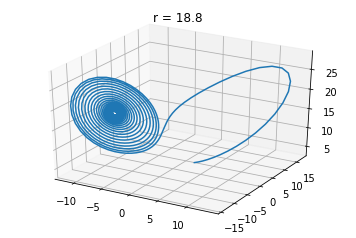

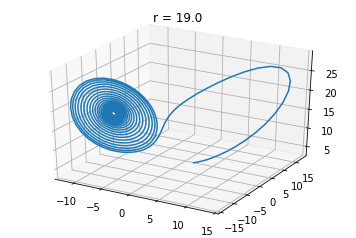

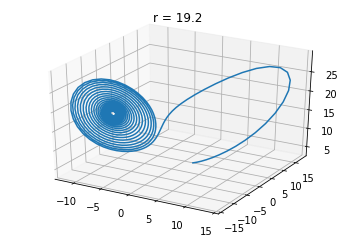

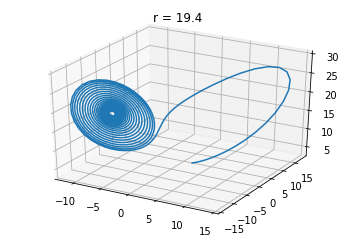

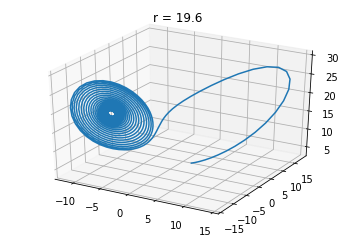

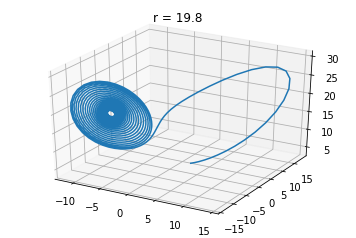

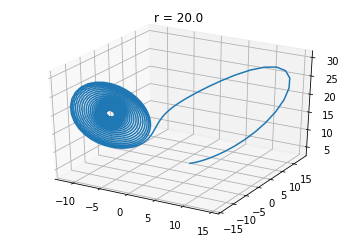

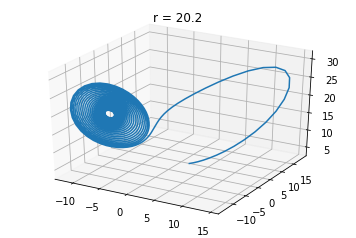

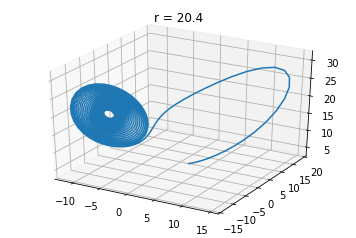

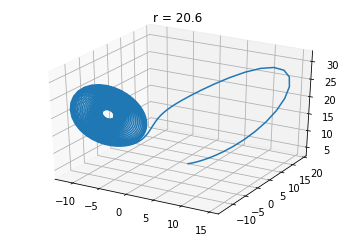

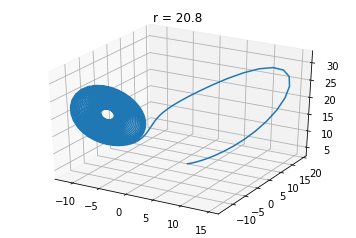

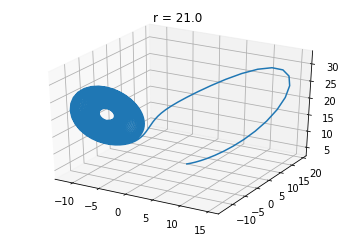

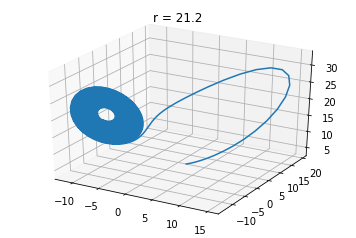

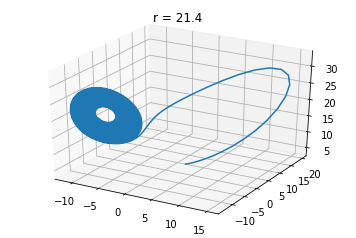

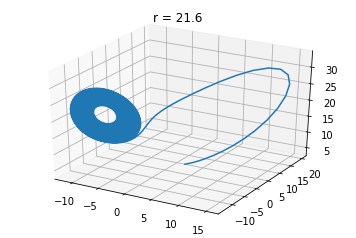

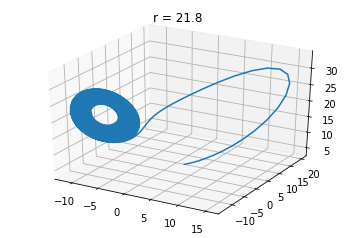

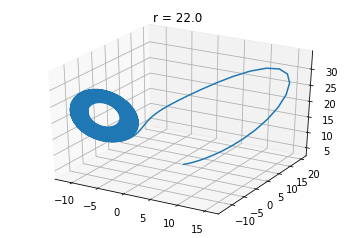

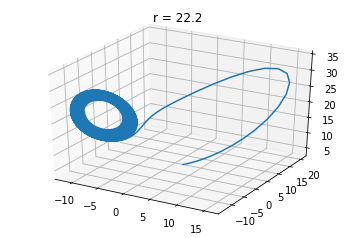

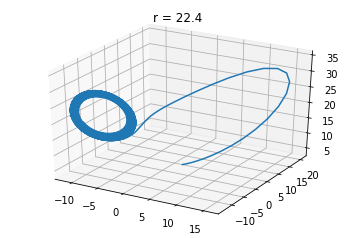

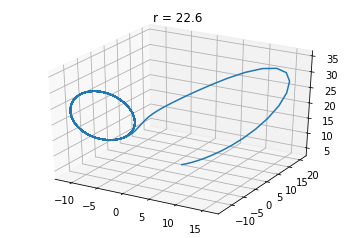

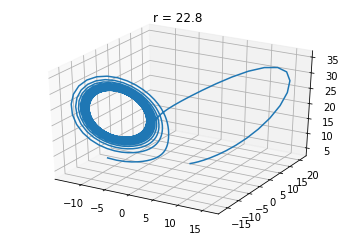

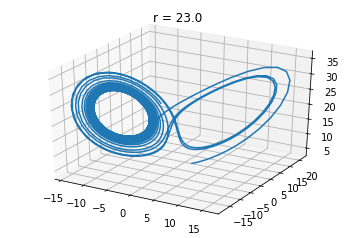

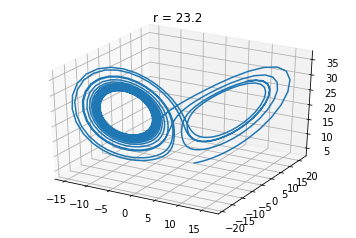

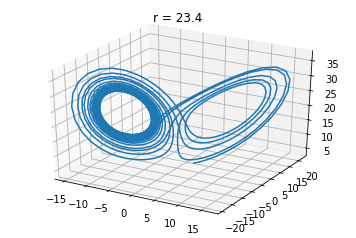

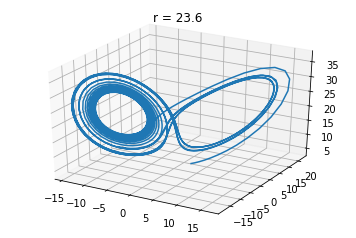

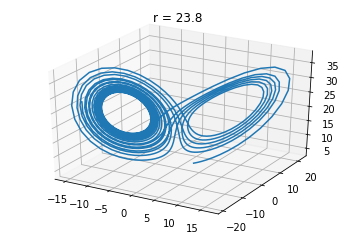

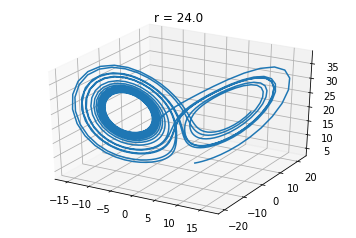

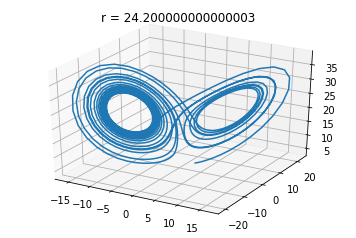

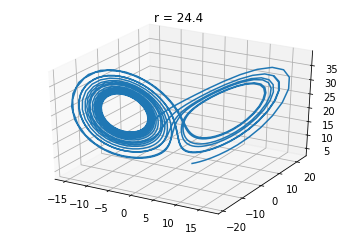

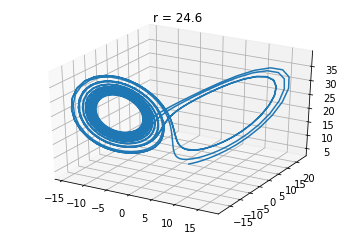

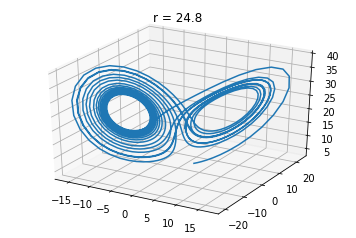

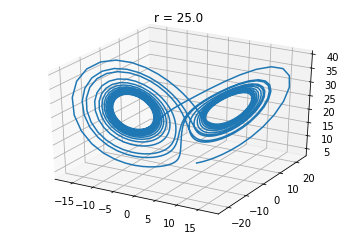

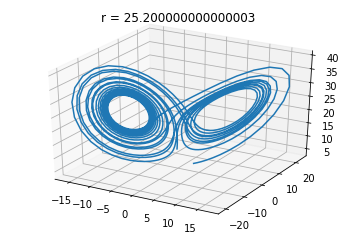

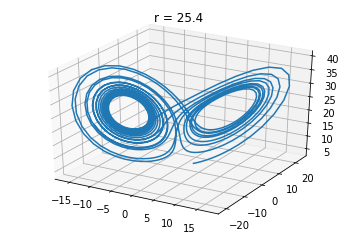

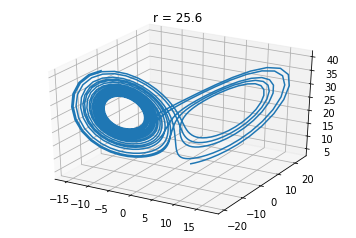

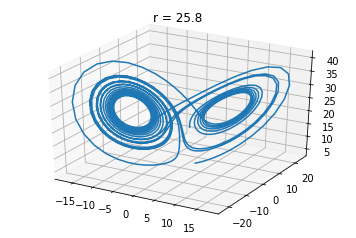

In [62]:
def norm(a,b,c):
    return (a ** 2 + b ** 2 + c ** 2) ** 0.5
r = 16
for i in range(50):
    r = 16 + i *0.2
    #print('r:', r)
    #xs, ys, zs = solve([2,4,3], 0.01, method('adams'), 10000)
    #print('norm:', norm(xs[-1] - xs[-10], ys[-1] - ys[-10], zs[-1] - zs[-10]))
    #print()
    draw()

In [168]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', label = 'z')
xs, ys, zs = solve([2,1,1], 0.02, method('adams'), 1000)
ts = [0.02 * i for i in range(1000)]
ax.plot(xs, ys, zs)
plt.show()

In [ ]:
16,17